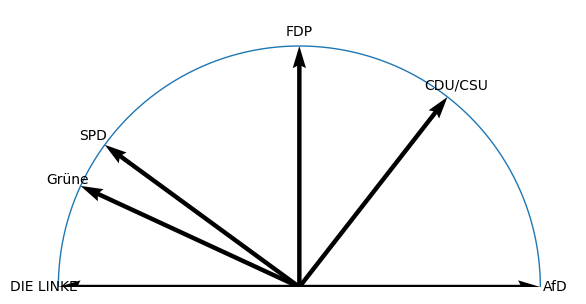

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt

# --- Party direction vectors as in your data (stored as [y, x]) ---
v_linke  = [-1.0, 0.0]
v_gruene = [-0.9077674463309972, 0.4194737934385177]
v_spd    = [-0.8074405688999996, 0.5899489195637577]
v_fdp    = [0.0, 1.0]
v_cdu    = [0.614758038308033, 0.788715762702673]
v_afd    = [1.0, 0.0]

parties_yx = {
    "DIE LINKE": v_linke,
    "Grüne": v_gruene,
    "SPD": v_spd,
    "FDP": v_fdp,
    "CDU/CSU": v_cdu,
    "AfD": v_afd,
}

# --- Mapping: normalized angle a∈[-1,1] -> unit vector (x, y) ---
# This places Linke (a=-1) at (-1, 0) and AfD (a=+1) at (+1, 0).
def angle_to_vector_xy(a_norm: float) -> tuple[float, float]:
    rad = a_norm * (np.pi / 2.0)
    return (math.sin(rad), math.cos(rad))  # x = sin, y = cos

# Recover normalized angles from the provided [y, x] vectors
angles_norm = {
    name: math.atan2(y, x) / (np.pi / 2.0) for name, (y, x) in parties_yx.items()
}

# Build endpoints on the unit circle using the horizontal convention
endpoints_xy = {name: angle_to_vector_xy(a) for name, a in angles_norm.items()}

# Ensure exact horizontal placement for Linke/AfD (removes any tiny FP noise)
endpoints_xy["DIE LINKE"] = (-1.0, 0.0)
endpoints_xy["AfD"]       = ( 1.0, 0.0)

# --- Plot (only arrows, labels, and upper semicircle) ---
fig, ax = plt.subplots(figsize=(6, 6))

# Upper half of the unit circle (theta: 0..π)
theta = np.linspace(0, np.pi, 400)
ax.plot(np.cos(theta), np.sin(theta), linewidth=1)  # upper semicircle only

# Draw party arrows and labels
for name, (x, y) in endpoints_xy.items():
    ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, width=0.008)
    # label slightly beyond the tip
    r = math.hypot(x, y)
    ox, oy = (x / r) * 0.06, (y / r) * 0.06
    ax.text(x + ox, y + oy, name, fontsize=10, ha='center', va='center')

# Keep only the essentials
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.15, 1.15)
ax.set_ylim(0.0, 1.15)        # upper half only
ax.set_axis_off()             # remove axes, ticks, spines, labels

plt.tight_layout()
plt.savefig("vectors_before_optimization.pdf", bbox_inches='tight')
plt.show()


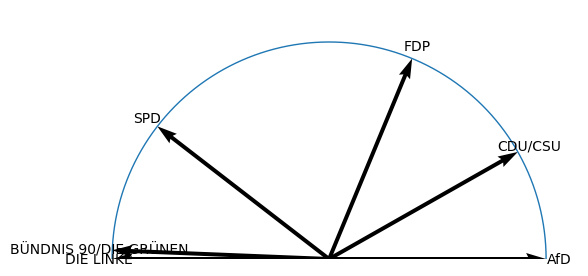

In [4]:
#Gemma2-9b
# --- Party direction vectors as in your data (stored as [y, x]) ---
v_linke  = [-1.00000000e+00,  6.12323400e-17]
v_gruene = [-9.99193435e-01,  4.01556900e-02]
v_spd    = [-7.91445449e-01,  6.11239806e-01]
v_fdp    = [ 3.82683432e-01,  9.23879533e-01]
v_cdu    = [ 8.69790824e-01,  4.93420634e-01]
v_afd    = [ 1.00000000e+00,  6.12323400e-17]

parties_yx = {
    "DIE LINKE": v_linke,
    "BÜNDNIS 90/DIE GRÜNEN": v_gruene,
    "SPD": v_spd,
    "FDP": v_fdp,
    "CDU/CSU": v_cdu,
    "AfD": v_afd,
}

# --- Mapping: normalized angle a∈[-1,1] -> unit vector (x, y) ---
# This places Linke (a=-1) at (-1, 0) and AfD (a=+1) at (+1, 0).
def angle_to_vector_xy(a_norm: float) -> tuple[float, float]:
    rad = a_norm * (np.pi / 2.0)
    return (math.sin(rad), math.cos(rad))  # x = sin, y = cos

# Recover normalized angles from the provided [y, x] vectors
angles_norm = {
    name: math.atan2(y, x) / (np.pi / 2.0) for name, (y, x) in parties_yx.items()
}

# Build endpoints on the unit circle using the horizontal convention
endpoints_xy = {name: angle_to_vector_xy(a) for name, a in angles_norm.items()}

# Ensure exact horizontal placement for Linke/AfD (removes any tiny FP noise)
endpoints_xy["DIE LINKE"] = (-1.0, 0.0)
endpoints_xy["AfD"]       = ( 1.0, 0.0)

# --- Plot (only arrows, labels, and upper semicircle) ---
fig, ax = plt.subplots(figsize=(6, 6))

# Upper half of the unit circle (theta: 0..π)
theta = np.linspace(0, np.pi, 400)
ax.plot(np.cos(theta), np.sin(theta), linewidth=1)  # upper semicircle only

# Draw party arrows and labels
for name, (x, y) in endpoints_xy.items():
    ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, width=0.008)
    # label slightly beyond the tip
    r = math.hypot(x, y)
    ox, oy = (x / r) * 0.06, (y / r) * 0.06
    ax.text(x + ox, y + oy, name, fontsize=10, ha='center', va='center')

# Keep only the essentials
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.15, 1.15)
ax.set_ylim(0.0, 1.15)        # upper half only
ax.set_axis_off()             # remove axes, ticks, spines, labels

plt.tight_layout()
plt.show()

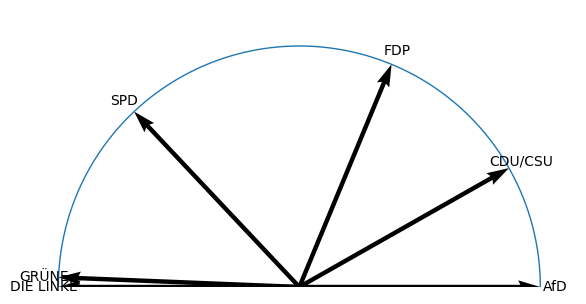

In [18]:
#Gemma2-2b
import math
import numpy as np
import matplotlib.pyplot as plt

# --- Party direction vectors as in your data (stored as [y, x]) ---
def get_vectors(angles):
    return np.column_stack((np.sin(angles*(np.pi/2)),np.cos(angles*(np.pi/2))))
    
a_linke  = -1
a_gruene = -0.9744292185505592
a_spd    = -0.48095682414887764
a_fdp    = 0.24999999999959452
a_cdu      = 0.6714926780686945
a_afd      = 1

initial_angles = np.array([a_linke, a_gruene, a_spd, a_fdp, a_cdu, a_afd])

vectors = get_vectors(initial_angles)

parties_yx = {
    "DIE LINKE": vectors[0],
    "GRÜNE": vectors[1],
    "SPD": vectors[2],
    "FDP": vectors[3],
    "CDU/CSU": vectors[4],
    "AfD": vectors[5],
}

# --- Mapping: normalized angle a∈[-1,1] -> unit vector (x, y) ---
# This places Linke (a=-1) at (-1, 0) and AfD (a=+1) at (+1, 0).
def angle_to_vector_xy(a_norm: float) -> tuple[float, float]:
    rad = a_norm * (np.pi / 2.0)
    return (math.sin(rad), math.cos(rad))  # x = sin, y = cos

# Recover normalized angles from the provided [y, x] vectors
angles_norm = {
    name: math.atan2(y, x) / (np.pi / 2.0) for name, (y, x) in parties_yx.items()
}

# Build endpoints on the unit circle using the horizontal convention
endpoints_xy = {name: angle_to_vector_xy(a) for name, a in angles_norm.items()}

# Ensure exact horizontal placement for Linke/AfD (removes any tiny FP noise)
endpoints_xy["DIE LINKE"] = (-1.0, 0.0)
endpoints_xy["AfD"]       = ( 1.0, 0.0)

# --- Plot (only arrows, labels, and upper semicircle) ---
fig, ax = plt.subplots(figsize=(6, 6))

# Upper half of the unit circle (theta: 0..π)
theta = np.linspace(0, np.pi, 400)
ax.plot(np.cos(theta), np.sin(theta), linewidth=1)  # upper semicircle only

# Draw party arrows and labels
for name, (x, y) in endpoints_xy.items():
    ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, width=0.008)
    # label slightly beyond the tip
    r = math.hypot(x, y)
    ox, oy = (x / r) * 0.06, (y / r) * 0.06
    ax.text(x + ox, y + oy, name, fontsize=10, ha='center', va='center')

# Keep only the essentials
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.15, 1.15)
ax.set_ylim(0.0, 1.15)        # upper half only
ax.set_axis_off()             # remove axes, ticks, spines, labels

plt.tight_layout()
plt.savefig("vectors_after_optimization.pdf", bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>